<a href="https://colab.research.google.com/github/1337Rinz/AI_ML/blob/main/data_preparation_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bai 1

In [1]:
!pip install pyvi

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from pyvi import ViTokenizer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files

In [4]:
%matplotlib inline

In [5]:
INPUT = '/content/drive/MyDrive/Đại Học/Học máy và ứng dụng/DATA/news_vnexpress'

In [6]:
os.makedirs("image", exist_ok=True)  # thu muc luu cac hinh anh ket qua trong qua trinh huan luyen va danh gia

In [7]:
#statics
print("cac nhan va so van ban tuong ung trong du lieu")
print('----------------------------------------------')
n = 0
for label in os.listdir(INPUT):
  print(f'{label}: {len(os.listdir(os.path.join(INPUT, label)))}')
  n += len(os.listdir(os.path.join(INPUT, label)))

print('----------------------------------------------')
print(f"Tổng số văn bản: {n}")

cac nhan va so van ban tuong ung trong du lieu
----------------------------------------------
giao-duc: 105
du-lich: 54
khoa-hoc: 144
giai-tri: 201
kinh-doanh: 262
suc-khoe: 162
doi-song: 120
phap-luat: 59
the-thao: 173
thoi-su: 59
----------------------------------------------
Tổng số văn bản: 1339


In [8]:
# load data
data_train = load_files(container_path=INPUT, encoding="utf-8")
print("mapping:")
for i in range(len(data_train.target_names)):
  print(f'{data_train.target_names[i]} - {i}')

print('----------------------------------------------')
print(data_train.filenames[0:1])
# print(data_train.data[0:1])
print(data_train.target[0:1])
print(data_train.data[0:1])

print('\nTổng số  văn bản: {}'.format( len(data_train.filenames)))

mapping:
doi-song - 0
du-lich - 1
giai-tri - 2
giao-duc - 3
khoa-hoc - 4
kinh-doanh - 5
phap-luat - 6
suc-khoe - 7
the-thao - 8
thoi-su - 9
----------------------------------------------
['/content/drive/MyDrive/Đại Học/Học máy và ứng dụng/DATA/news_vnexpress/khoa-hoc/00133.txt']
[4]
['Mời độc giả đặt câu hỏi tại đây\n']

Tổng số  văn bản: 1339


In [9]:
# load dữ liệu các stopwords
with open("/content/drive/MyDrive/Đại Học/Học máy và ứng dụng/DATA/vietnamese-stopwords.txt") as f:
  stopwords = f.readlines()
stopwords = [x.strip().replace(" ", "_") for x in stopwords]
print(f'so luong stopwords: {len(stopwords)}')
print(stopwords[:10])

so luong stopwords: 2063
['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']


In [10]:
# chuyen hoa du lieu text ve dang vector TF
# loại bỏ từ dừng
# sinh từ điển
module_count_vector = CountVectorizer(stop_words=stopwords)
model_rf_preprocess = Pipeline([('vect', module_count_vector),
                      ('tfidf', TfidfTransformer()),
                      ])
# Hàm thực hiện chuyển đổi dữ liệu text thành dữ liệu số dạng ma trận
# Input: Dữ liệu 2 chiều dạng numpy.array, mảng nhãn id dạng numpy.array
data_preprocessed = model_rf_preprocess.fit_transform(data_train.data,data_train.target)

In [11]:
print( f"Số lượng từ trong từ điển: {len(module_count_vector.vocabulary_)}")
print(f"Kích thước dữ liệu sau khi xử lý: {data_preprocessed.shape}")
print(f"Kích thước nhãn tương ứng: {data_train.target.shape}")

X = data_preprocessed
Y = data_train.target
X.shape, Y.shape

print(X[1].toarray())
print(Y[1])

Số lượng từ trong từ điển: 12796
Kích thước dữ liệu sau khi xử lý: (1339, 12796)
Kích thước nhãn tương ứng: (1339,)
[[0. 0. 0. ... 0. 0. 0.]]
7


#Bai2

In [12]:
import pandas as pd

In [13]:
my_data = pd.read_csv("/content/drive/MyDrive/Đại Học/Học máy và ứng dụng/DATA/drug200.csv", delimiter=',')
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [14]:
my_data.shape

(200, 6)

In [15]:
# define feature

X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [16]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

In [17]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

In [18]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

In [19]:
print(X[0:5])

[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.114]
 [28 0 2 0 7.798]
 [61 0 1 0 18.043]]


In [20]:
# normalize Na_to_K -> mean=0 std =1

mean = X[:, -1].mean()
std = X[: -1].std()
X[:, -1] = (X[:, -1] - mean)/ std
print(X[0:5])

[[23 0 0 0 0.49193418662236954]
 [47 1 1 0 -0.15874131483180953]
 [47 1 1 0 -0.3168201208040815]
 [28 0 2 0 -0.4397172388409335]
 [61 0 1 0 0.10392739599824967]]


In [21]:
#define label
y = my_data["Drug"]
print(y[0:5])

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object


In [22]:
# y to numerical
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['drugA','drugB', 'drugC', 'drugX', 'drugY'])
y = le_sex.transform(y)

print(y[0:5])

[4 2 2 3 4]


#Bài3

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import math
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
with open('/content/drive/MyDrive/Đại Học/Học máy và ứng dụng/diabetes_train.pkl', 'rb') as f:
  diabetes_train = pickle.load(f)
print('Số chiều input: ', diabetes_train['data'].shape)
print('Số chiều target y tương ứng: ', diabetes_train['target'].shape)
print()

Số chiều input:  (400, 10)
Số chiều target y tương ứng:  (400,)



In [27]:
print('2 mẫu dữ liệu đầu tiên:')
print('input: ', diabetes_train['data'][:2])
print('target: ',diabetes_train['target'][:2])

2 mẫu dữ liệu đầu tiên:
input:  [[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]]
target:  [151.  75.]


In [28]:
# Xây dựng mô hình sử dụng thư viện scikit-learn
regr = linear_model.LinearRegression()

In [29]:
# huấn luyện mô hình
regr.fit(diabetes_train['data'], diabetes_train['target'])
print("[w1, ... w_n] = ", regr.coef_)
print("w0 = ", regr.intercept_)

[w1, ... w_n] =  [   5.02597344 -238.41461528  521.63399624  299.94110951 -752.12376074
  445.15341214   83.51201877  185.57718337  706.4729074    88.68448421]
w0 =  152.72942545098695


In [30]:
# đọc dữ liệu test
# dữ liệu test có cấu trúc giống dữ liệu huấn luyện nhưng số lượng mẫu chỉ là 42
with open("/content/drive/MyDrive/Đại Học/Học máy và ứng dụng/diabetes_test.pkl", "rb") as f:
  diabetes_test = pickle.load(f)
# Thực hiện phán đoán cho dữ liệu mới
diabetes_y_pred = regr.predict(diabetes_test["data"])

In [31]:
df = pd.DataFrame(data=np.array([diabetes_test["target"], diabetes_y_pred,
                                 abs(diabetes_test["target"] -
                                     diabetes_y_pred)]).T,
                                    columns=["y thực tế", "y dự đoán", "Lệch"])

In [32]:
df.head()

,y thực tế,y dự đoán,Lệch
0,175.0,185.393435,10.393435
1,93.0,90.338849,2.661151
2,168.0,152.325453,15.674547
3,275.0,250.866783,24.133217
4,293.0,198.458698,94.541302


In [34]:
#RMSE
rmse = math.sqrt(mean_squared_error(diabetes_test["target"],
diabetes_y_pred))
print(f"RMSE = {rmse}")

RMSE = 40.85033252728767


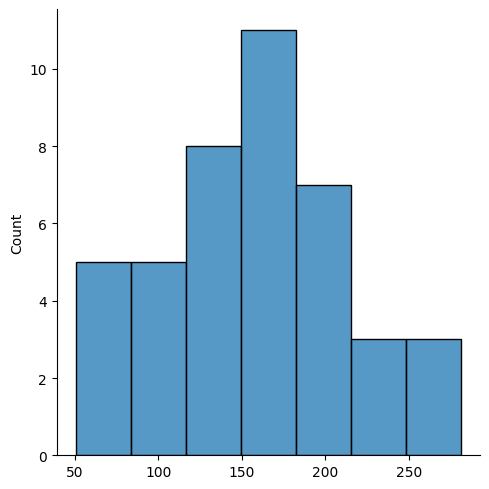

In [35]:
sns.displot(diabetes_y_pred, )